In [1]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn import manifold
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
digits = load_digits()
X_digits, Y_digits  = digits.data, digits. target
print('Dataset Size : ', X_digits.shape, Y_digits.shape)

Dataset Size :  (1797, 64) (1797,)


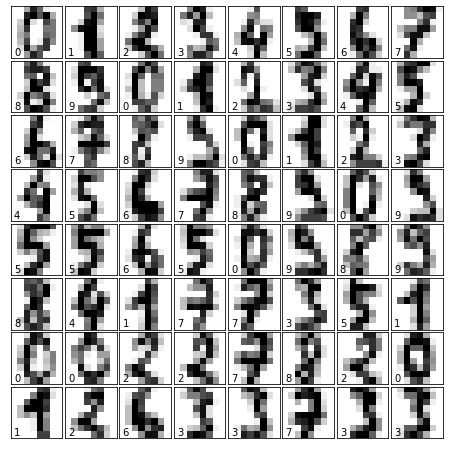

In [3]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [4]:
def plot_digits(X, algo=""):
    with plt.style.context(("seaborn", "ggplot")):
        fig = plt.figure(1, figsize=(10, 6))

        colors = ['red','green','orange','blue','purple','cyan','magenta', 'firebrick', 'lawngreen','indigo']
        for digit in range(0,9):
            plt.scatter(X[Y_digits==digit,0],X[Y_digits==digit,1], c = colors[digit], marker="$"+str(digit)+"$",s =50, alpha=0.5)
        plt.xlabel("New Feature 1")
        plt.ylabel("New Feature 2")
        plt.title(algo)
        plt.show()

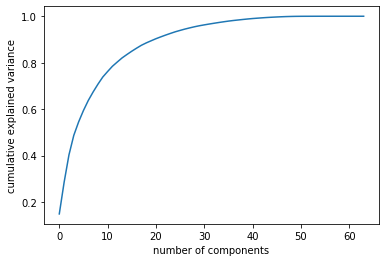

In [5]:
pca = PCA().fit(X_digits)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [23]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

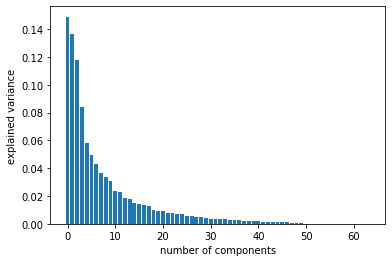

In [26]:
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance');

In [6]:
digits_pca = PCA(n_components=2).fit(X_digits)

In [7]:
digits_pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# The singular values corresponding to each of the selected components.
print(digits_pca.singular_values_)

[567.0065665  542.25185421]


In [9]:
print(digits_pca.explained_variance_ratio_)

[0.14890594 0.13618771]


In [10]:
X_digits_pca = PCA(n_components=2).fit_transform(X_digits)

In [11]:
X_digits_pca.shape

(1797, 2)

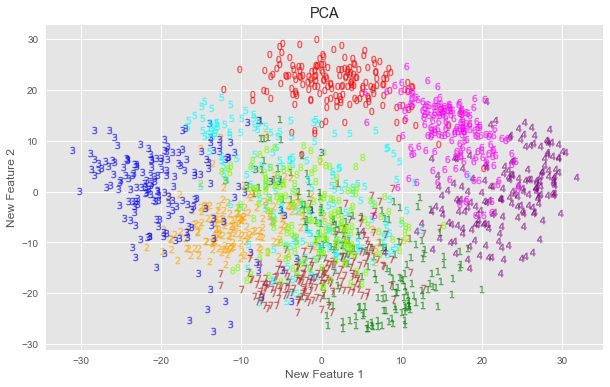

In [12]:
plot_digits(X_digits_pca, "PCA")

In [13]:
isomap = manifold.Isomap(n_neighbors=5, n_components=2)
X_digits_isomap = isomap.fit_transform(X_digits)

In [14]:
print("Embedding Shape : ",isomap.embedding_.shape)

Embedding Shape :  (1797, 2)


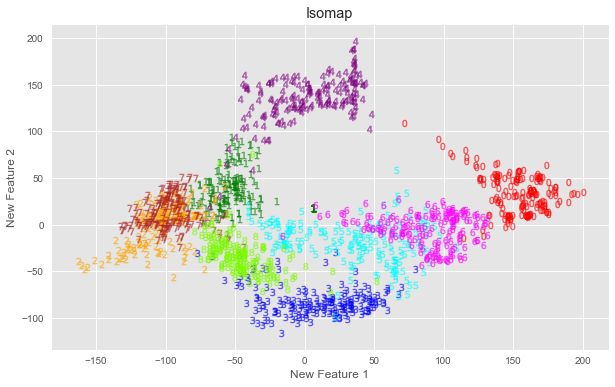

In [15]:
plot_digits(X_digits_isomap, "Isomap")

In [16]:
tsne = manifold.TSNE(random_state=42, n_components=2)
X_digits_tsne = tsne.fit_transform(X_digits)

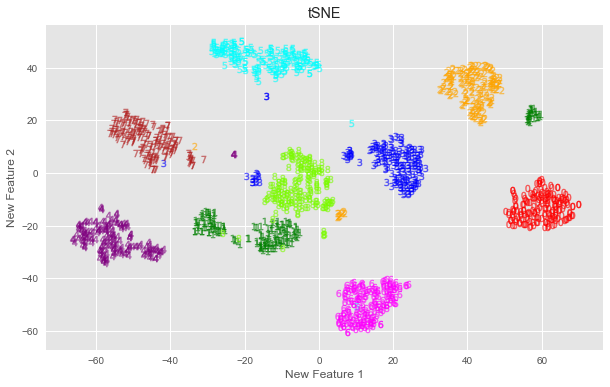

In [17]:
plot_digits(X_digits_tsne, "tSNE")

In [18]:
tsne = manifold.TSNE(perplexity=5, random_state=42, n_components=2)
X_digits_tsne = tsne.fit_transform(X_digits)

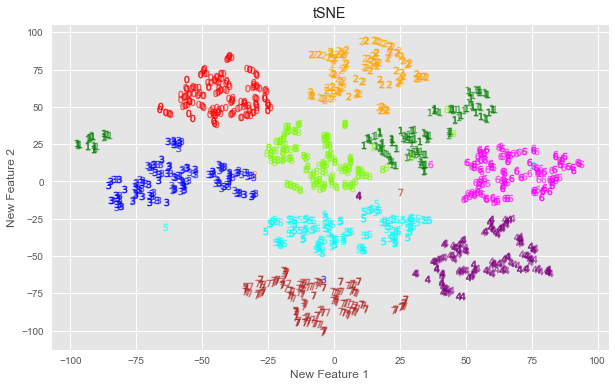

In [19]:
plot_digits(X_digits_tsne, "tSNE")